In [1]:
import os
import pandas as pd
import numpy as np
import sys

src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(src_path)

from src import query_engines

q = query_engines.QueryEngines()


/Users/jordicremades/Documents/repos/central-node/venvs/venv_glovo_experimentation_analytics/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
QUERY_NAME = 'orders_in_barcelona.sql'
START_DATE = "'2024-12-01'"
END_DATE = "'2024-12-16'"

params = [
    {'name':'start_date', 'value':str(START_DATE)},
    {'name':'end_date', 'value':str(END_DATE)}
]

q.prepare_query(
    QUERY_NAME,
    params=params,
    to_load_file=QUERY_NAME,
    load_from_to_load_file=QUERY_NAME
)

df = q.query_run_starburst()

# Session 1

<Axes: >

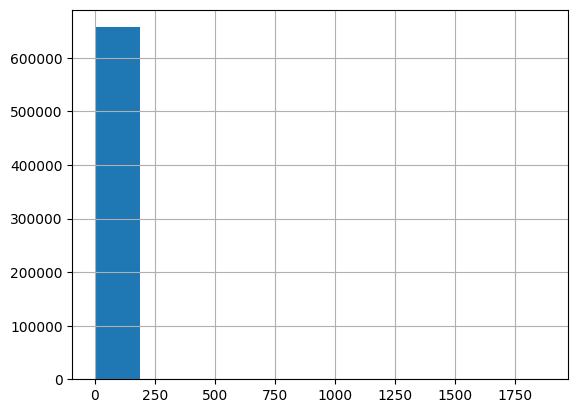

In [8]:
df['order_total_purchase_eur'].hist()

In [9]:
df.head()

,order_id,order_total_purchase_eur
0,101071208943,19.40
1,101071217941,23.70
2,101071249064,22.40
3,101071265146,28.25
4,101071311495,27.98


In [10]:
df.dropna(subset=['order_total_purchase_eur'], axis=0, inplace=True)

In [11]:
df['label'] = df['order_total_purchase_eur'].apply(lambda x: (
    'small' if 0 < x < 10 else
    'big' if 10 <= x else
    'undefined' 
))

df['rnd'] = np.random.choice([1,2,3,4,5,6], len(df))

df['half_price'] = df['order_total_purchase_eur'].apply(lambda x: x/2)

df.head()

,order_id,order_total_purchase_eur,label,rnd,half_price
0,101071208943,19.40,big,3,9.700
1,101071217941,23.70,big,4,11.850
2,101071249064,22.40,big,5,11.200
3,101071265146,28.25,big,1,14.125
4,101071311495,27.98,big,3,13.990


In [12]:
cond = df['order_total_purchase_eur'] < 30

df.describe()

,order_id,order_total_purchase_eur,rnd,half_price
count,6.575260e+05,657526.000000,657526.000000,657526.000000
mean,1.010602e+11,24.394598,3.500277,12.197299
std,1.083582e+07,19.278681,1.707493,9.639340
min,1.010415e+11,0.000000,1.000000,0.000000
25%,1.010510e+11,14.350000,2.000000,7.175000
50%,1.010601e+11,20.600000,3.000000,10.300000
75%,1.010699e+11,30.500000,5.000000,15.250000
max,1.010785e+11,1879.000000,6.000000,939.500000


In [13]:
df['label'].value_counts()

label
big          599644
undefined     31446
small         26436
Name: count, dtype: int64

In [14]:
group = df.groupby('label')[['order_total_purchase_eur','half_price']].apply('sum','nunique').reset_index()
group['eur_distrib'] = group['order_total_purchase_eur']/group['order_total_purchase_eur'].sum()
group

,label,order_total_purchase_eur,half_price,eur_distrib
0,big,15842259.18,7921129.590,0.987667
1,small,197823.05,98911.525,0.012333
2,undefined,0.00,0.000,0.000000


In [15]:
df

,order_id,order_total_purchase_eur,label,rnd,half_price
0,101071208943,19.40,big,3,9.700
1,101071217941,23.70,big,4,11.850
2,101071249064,22.40,big,5,11.200
3,101071265146,28.25,big,1,14.125
4,101071311495,27.98,big,3,13.990
...,...,...,...,...,...
657645,101061197624,17.76,big,3,8.880
657646,101061220406,18.13,big,5,9.065
657647,101061228238,119.98,big,6,59.990
657648,101061239812,9.99,small,5,4.995


In [16]:
pivot.columns

NameError: name 'pivot' is not defined

In [63]:
pivot = df.pivot_table(index=['label'], columns=['rnd'], values=['order_total_purchase_eur'], aggfunc=['sum']).reset_index()
pivot.columns = [f'{col[0]}_{col[1]}' for col in pivot.columns]
pivot

,label_,sum_order_total_purchase_eur,sum_order_total_purchase_eur,sum_order_total_purchase_eur,sum_order_total_purchase_eur,sum_order_total_purchase_eur,sum_order_total_purchase_eur
0,big,2403727.49,2413748.84,2432529.49,2432521.49,2414673.55,2403611.62
1,small,29990.05,30439.28,30295.32,29539.25,30422.31,31234.77
2,undefined,0.00,0.00,0.00,0.00,0.00,0.00


In [67]:
pivot.to_csv('test.csv', index=False)

In [69]:
read_pivot = pd.read_csv('test.csv') 
read_pivot

,label_,sum_order_total_purchase_eur,sum_order_total_purchase_eur.1,sum_order_total_purchase_eur.2,sum_order_total_purchase_eur.3,sum_order_total_purchase_eur.4,sum_order_total_purchase_eur.5
0,big,2403727.49,2413748.84,2432529.49,2432521.49,2414673.55,2403611.62
1,small,29990.05,30439.28,30295.32,29539.25,30422.31,31234.77
2,undefined,0.00,0.00,0.00,0.00,0.00,0.00


In [71]:
np.random.choice([1,2,3,4,5,6],5)

array([1, 5, 2, 1, 2])

In [19]:
percentiles = [0.1,0.25,0.5,0.75,0.9,0.99]

quant = pd.DataFrame(df['order_total_purchase_eur'].quantile(percentiles))
quant.reset_index(inplace=True)
the_value = quant.iloc[5]
the_value


#cond['order_total_purchase_eur'] > 84.3542

index                        0.99
order_total_purchase_eur    84.10
Name: 5, dtype: float64

In [24]:
help(np.random.normal())

Help on float object:

class float(object)
 |  float(x=0, /)
 |  
 |  Convert a string or number to a floating point number, if possible.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __ceil__(self, /)
 |      Return the ceiling as an Integral.
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floor__(self, /)
 |      Return the floor as an Integral.
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __format__(self, format_spec, /)
 |      Formats the float according to format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 

In [30]:
np.random.Generator.normal(0,1, size=(2,4))

TypeError: descriptor 'normal' for 'numpy.random._generator.Generator' objects doesn't apply to a 'int' object

In [27]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the `~numpy.random.Generator.normal`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
     

# Session 2


In [ ]:
df['bins'] = df['order_total_purchase_eur'].apply(lambda x:
    'big' if x>10 else
    'small' if 0<x<=10 else
    'nothing'
)

df['half_pice'] = df['order_total_purchase_eur'].apply(lambda x: x/2)

df

,order_id,order_total_purchase_eur,bins,half_pice
0,101071208943,19.40,big,9.700
1,101071217941,23.70,big,11.850
2,101071249064,22.40,big,11.200
3,101071265146,28.25,big,14.125
4,101071311495,27.98,big,13.990
...,...,...,...,...
657645,101061197624,17.76,big,8.880
657646,101061220406,18.13,big,9.065
657647,101061228238,119.98,big,59.990
657648,101061239812,9.99,small,4.995


In [26]:
group = df.groupby('bins')['order_total_purchase_eur'].agg(['min','max','mean'])
group

,min,max,mean
bins,,,
big,10.01,1879.0,26.478000
nothing,0.00,0.0,0.000000
small,0.01,10.0,7.670846


In [89]:
percentiles = df.groupby('bins')['order_total_purchase_eur'].agg([
    lambda x: np.percentile(x,25),
    lambda x: np.percentile(x,50),
    lambda x: np.percentile(x,75),
    lambda x: np.percentile(x,100)
])

percentiles.columns = ['25','50','75','100']
percentiles = percentiles.reset_index()
percentiles

,bins,25,50,75,100
0,big,15.8,22.14,31.80,1879.0
1,nothing,NaN,NaN,NaN,NaN
2,small,6.3,8.40,9.61,10.0


In [ ]:
cities = ['BCN', 'MAD']

def assign_random_city(n):
    return np.random.choice(cities,n)

random_cities = assign_random_city(len(df))

df['random_cities'] = random_cities
df

,order_id,order_total_purchase_eur,bins,half_pice,random_cities
0,101071208943,19.40,big,9.700,MAD
1,101071217941,23.70,big,11.850,MAD
2,101071249064,22.40,big,11.200,MAD
3,101071265146,28.25,big,14.125,BCN
4,101071311495,27.98,big,13.990,MAD
...,...,...,...,...,...
657645,101061197624,17.76,big,8.880,MAD
657646,101061220406,18.13,big,9.065,BCN
657647,101061228238,119.98,big,59.990,MAD
657648,101061239812,9.99,small,4.995,BCN


# Session 3

In [101]:
import numpy as np
from scipy.stats import ttest_ind

In [153]:


results = []
# Perform independent t-test
for i in range(0,10000):
    mu, sigma = 0,1
    sample_normal = np.random.normal(mu,sigma,100)
    sn_df = pd.DataFrame(sample_normal)
    sn_df.columns = ['sample_point']

    mu, sigma = 0,1
    samplle_normal2 = np.random.normal(mu,sigma,100)
    sn_df2 = pd.DataFrame(samplle_normal2)
    sn_df2.columns = ['sample_point']

    t_statistic, p_value = ttest_ind(sn_df['sample_point'], sn_df2['sample_point'])
    if(p_value < 0.05):
        results.append(True)
    else:
        results.append(False)

r = pd.DataFrame(results)
r.columns = ['is_significant']

In [155]:
group = r.groupby('is_significant')['is_significant'].agg(['count'])
group.reset_index()

,is_significant,count
0,False,9489
1,True,511


# Session 4

In [255]:
QUERY_NAME = 'orders_in_barcelona.sql'
START_DATE = "'2024-12-01'"
END_DATE = "'2024-12-16'"

params = [
    {'name':'start_date', 'value':str(START_DATE)},
    {'name':'end_date', 'value':str(END_DATE)}
]

q.prepare_query(
    QUERY_NAME,
    params=params,
    to_load_file=QUERY_NAME,
    load_from_to_load_file=QUERY_NAME
)

df = q.query_run_starburst()

In [256]:
cities = ['BCN', 'MAD']

import numpy as np

r = np.random.choice(cities, len(df))

df['cities'] = r
df

,order_id,order_total_purchase_eur,cities
0,101071208943,19.40,MAD
1,101071217941,23.70,BCN
2,101071249064,22.40,BCN
3,101071265146,28.25,MAD
4,101071311495,27.98,MAD
...,...,...,...
657645,101061197624,17.76,BCN
657646,101061220406,18.13,BCN
657647,101061228238,119.98,BCN
657648,101061239812,9.99,MAD


In [175]:
df['half'] = df['order_total_purchase_eur'].apply(lambda x: x/2)
df['bin'] = df['order_total_purchase_eur'].apply(lambda x:
    'big' if x > 10 else
    'small' if x< 10 else
    'not_defined'                                  
)
df

df['bin'].value_counts()

bin
big            597513
small           57882
not_defined      2255
Name: count, dtype: int64

In [ ]:
df.groupby('bin')['bin'].count()

bin
big            597513
not_defined      2255
small           57882
Name: bin, dtype: int64

In [199]:
percentiles

p = df.pivot_table(index=['cities'], columns=['bin'], values=['order_total_purchase_eur'], aggfunc=['min','max','mean'])
p

min                                        max  \
       order_total_purchase_eur                   order_total_purchase_eur   
bin                         big not_defined small                      big   
cities                                                                       
BCN                       10.01        10.0   0.0                   1879.0   
MAD                       10.01        10.0   0.0                   1469.0   

                                             mean                        
                         order_total_purchase_eur                        
bin    not_defined small                      big not_defined     small  
cities                                                                   
BCN           10.0  9.99                26.504794        10.0  3.409297  
MAD           10.0  9.99                26.451216        10.0  3.426020

In [207]:
df.drop(columns=['rank'])

,order_id,order_total_purchase_eur,cities,half,bin
0,101071208943,19.40,BCN,9.700,big
1,101071217941,23.70,MAD,11.850,big
2,101071249064,22.40,MAD,11.200,big
3,101071265146,28.25,BCN,14.125,big
4,101071311495,27.98,MAD,13.990,big
...,...,...,...,...,...
657645,101061197624,17.76,BCN,8.880,big
657646,101061220406,18.13,MAD,9.065,big
657647,101061228238,119.98,BCN,59.990,big
657648,101061239812,9.99,MAD,4.995,small


In [209]:
df['rank'] = df['order_total_purchase_eur'].rank()
df

,order_id,order_total_purchase_eur,cities,half,bin,rank
0,101071208943,19.40,BCN,9.700,big,303677.5
1,101071217941,23.70,MAD,11.850,big,386281.5
2,101071249064,22.40,MAD,11.200,big,362518.5
3,101071265146,28.25,BCN,14.125,big,460799.5
4,101071311495,27.98,MAD,13.990,big,456457.5
...,...,...,...,...,...,...
657645,101061197624,17.76,BCN,8.880,big,265646.0
657646,101061220406,18.13,MAD,9.065,big,279389.0
657647,101061228238,119.98,BCN,59.990,big,655775.5
657648,101061239812,9.99,MAD,4.995,small,57519.5


In [225]:
df['rank'] = df.groupby('cities')['order_total_purchase_eur'].k()
df.dropna(inplace=True)
df.sort_values(by='rank', ascending=True)

TypeError: __call__() missing 1 required positional argument: 'n'

In [232]:
df['rank'] = df['order_total_purchase_eur'].rank(method='dense')
df.sort_values(by='rank')

,order_id,order_total_purchase_eur,cities,half,bin,rank
566859,101076465089,0.00,BCN,0.000,small,1.0
56231,101069884206,0.00,BCN,0.000,small,1.0
628035,101073177724,0.00,BCN,0.000,small,1.0
588628,101063496842,0.00,MAD,0.000,small,1.0
56243,101069927575,0.00,BCN,0.000,small,1.0
...,...,...,...,...,...,...
243992,101061758388,1469.00,BCN,734.500,big,10827.0
323738,101046771855,1513.99,BCN,756.995,big,10828.0
327522,101046691081,1608.00,BCN,804.000,big,10829.0
642733,101059621964,1878.00,BCN,939.000,big,10830.0


In [238]:
from sklearn.linear_model import LinearRegression

# 1. Prepare the Data
X = df[['order_id']]  # Independent variable
y = df['order_total_purchase_eur']       # Dependent variable

# 2. Create and Fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_

# 3. Model Predictions
y_pred = model.predict(X)

X


,order_id
0,101071208943
1,101071217941
2,101071249064
3,101071265146
4,101071311495
...,...
657645,101061197624
657646,101061220406
657647,101061228238
657648,101061239812


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'order_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'price': [100, 120, 130, 150, 170, 190, 200, 210, 250, 300]
}
df = pd.DataFrame(data)

# 1. Prepare the Data
X = df[['order_id']]  # Independent variable
y = df['price']       # Dependent variable

# 2. Create and Fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_

# 3. Model Predictions
y_pred = model.predict(X)

# 4. Visualize the Results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label=f'Regression Line: price = {slope:.2f}*order_id + {intercept:.2f}')
plt.xlabel('Order ID')
plt.ylabel('Price')
plt.legend()
plt.title('Linear Regression')
plt.show()

# 5. Print Results
print(f"Linear Regression Equation: price = {slope:.2f} * order_id + {intercept:.2f}")
print(f"R-squared Value: {model.score(X, y):.4f}")

In [186]:
help(df.pivot_table)

Help on method pivot_table in module pandas.core.frame:

pivot_table(values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins: 'bool' = False, dropna: 'bool' = True, margins_name: 'Level' = 'All', observed: 'bool | lib.NoDefault' = <no_default>, sort: 'bool' = True) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    values : list-like or scalar, optional
        Column or columns to aggregate.
    index : column, Grouper, array, or list of the previous
        Keys to group by on the pivot table index. If a list is passed,
        it can contain any of the other types (except list). If an array is
        passed, it must be the same length as the data and will be used in
        the same m

# Session 5

In [260]:
QUERY_NAME = 'corr.sql'
START_DATE = "'2024-12-01'"
END_DATE = "'2024-12-16'"

params = [
    {'name':'start_date', 'value':str(START_DATE)},
    {'name':'end_date', 'value':str(END_DATE)}
]

q.prepare_query(
    QUERY_NAME,
    params=params,
    to_load_file=QUERY_NAME,
    load_from_to_load_file=None
)

df = q.query_run_starburst()

/Users/jordicremades/Documents/repos/central-node/src/query_engines.py:138: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(self.tp__read_query, conn)


Open the following URL in browser for the external authentication:
https://starburst.g8s-data-platform-prod.glovoint.com/oauth2/token/initiate/6e62108a016f839c3a3a71bf93c74f3b21268c6d875b595ebd1d8361d0008d37


In [261]:
df

,customer_id,_col1,_col2
0,169666353,1,14.95
1,3858097,1,35.80
2,1220315,1,54.00
3,36220386,3,84.52
4,74420,4,175.50
...,...,...,...
252600,312837,1,15.40
252601,4586422,1,12.45
252602,126753267,1,11.85
252603,114368022,1,25.80


In [262]:
df.columns = ['customer_id', 'order', 'eur']

In [247]:
df['order'].corr(df['eur'])

0.5473553629713367

In [251]:
df.dropna(inplace=True)

In [253]:
# 1. Prepare the Data
X = df[['order']]  # Independent variable
y = df['eur']       # Dependent variable

# 2. Create and Fit the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_

# 3. Model Predictions
y_pred = model.predict(X)

# 5. Print Results
print(f"Linear Regression Equation: price = {slope:.2f} * order_id + {intercept:.2f}")
print(f"R-squared Value: {model.score(X, y):.4f}")

Linear Regression Equation: price = 5.80 * order_id + 50.76
R-squared Value: 0.2996


In [254]:
df.head()

,customer_id,order,eur
0,188851,6,178.35
1,256178,6,155.40
2,174820669,14,397.50
3,139674360,7,182.77
4,145968996,2,59.50


In [257]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import sys

# Move two levels up (to the project root) and append the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Append src to sys.path
sys.path.append(src_path)

from src import query_engines, dataframe_visualizer

In [263]:
df

,customer_id,order,eur
0,169666353,1,14.95
1,3858097,1,35.80
2,1220315,1,54.00
3,36220386,3,84.52
4,74420,4,175.50
...,...,...,...
252600,312837,1,15.40
252601,4586422,1,12.45
252602,126753267,1,11.85
252603,114368022,1,25.80


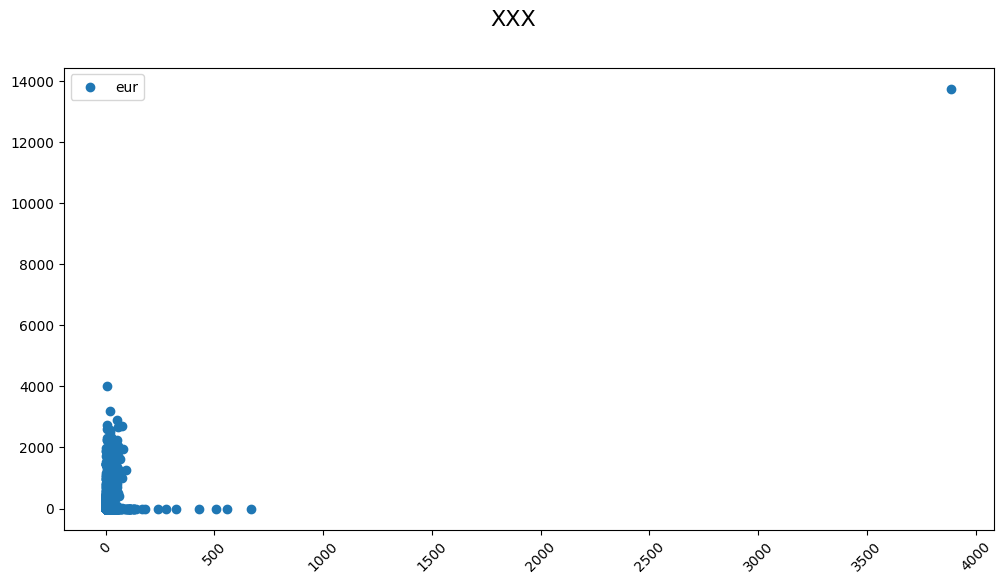

In [264]:
v = dataframe_visualizer.DataFrameVisualizer(df)

# Define the plot configurations for each subplot
plot_params = [
    {
        'plot_type': 'scatterplot',
        'x_column': 'order',
        'y_columns': ['eur'],
        'colors': ['blue'], # default None
        'legend': True # default True
    },
]

figure_params = {
    'n_plots': 1, # default 1
    'fig_length': 12, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': True, # default False
    'share_y': False, # default False
    'x_limits': None, # default None
    'y_limits': None, # default None
    'title': 'XXX' # default None
}

# Call the plot method to handle the entire flow
v.plot(
    figure_params=figure_params,
    plot_params=plot_params
)